In [120]:
import pandas as pd

df = pd.read_csv('traffic.csv')
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [121]:
df.sample(n=7,random_state=42)

,event,date,country,city,artist,album,track,isrc,linkid
178353,pageview,2021-08-19,France,Waziers,Shouse,Love Tonight,Love Tonight - Edit,USQY51798087,f2cef536-5a20-4dc1-a973-600051bdea04
188732,pageview,2021-08-25,India,Mumbai,gnash,us,"i hate u, i love u (feat. olivia o'brien)",USAT21601051,1210448a-5857-4b98-86d1-5cf4bb993a08
157609,pageview,2021-08-24,India,Kolkata,Tundra Beats,Beautiful Day,Beautiful Day,QZHN92194591,e849515b-929d-44c8-a505-e7622f1827e9
175465,pageview,2021-08-22,India,New Delhi,"Elton John, Dua Lipa, PNAU",Cold Heart (PNAU Remix),Cold Heart - PNAU Remix,GBUM72104705,79be7fba-0b11-4379-9df9-4f38388af5e5
28907,click,2021-08-19,Oman,Muscat,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
28140,click,2021-08-19,Guyana,Georgetown,SoFaygo,Angelic 7,Knock Knock,QZFYX2070670,cb8d374a-50a0-4d4b-8dba-b84892084f1a
161530,pageview,2021-08-19,United States,San Angelo,Wale,Ambition,Lotus Flower Bomb (feat. Miguel),NaN,f57dd0d4-1901-5d02-81b4-607b7686b2db


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


### #1
[Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?


In [123]:
df["event"].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [124]:
df[df["event"] == 'pageview'].shape[0]

142015

In [125]:
df[df["event"] == 'pageview'].groupby(by="date")["event"].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [126]:
# Check duplicates

duplicate_rows = df.duplicated().sum()
duplicate_rows

103711

In [127]:
df_xdup = df.drop_duplicates()
df_xdup[df_xdup["event"] == "pageview"].shape[0]


73360

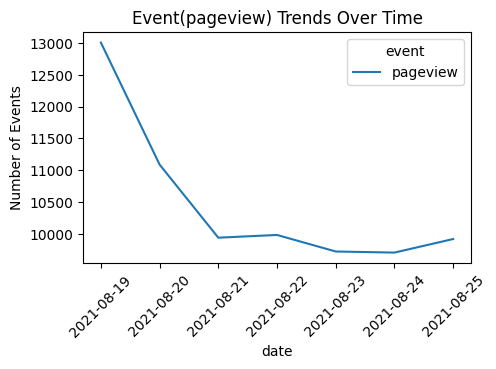

In [128]:
# Group by date and event type
# df_xdup['date'] = pd.to_datetime(df_xdup['date'])

event_trends = df_xdup[df_xdup['event']=='pageview'].groupby(['date', 'event']).size().unstack()

# Plotting
import matplotlib.pyplot as plt
event_trends.plot(kind='line', figsize=(5, 3),rot=45)
plt.title('Event(pageview) Trends Over Time')
plt.ylabel('Number of Events')
plt.show()

### #2
[Pandas] What about the other recorded events?


In [129]:
df_xdup[df_xdup['event'] != 'pageview']['event'].value_counts()

click      32499
preview    16708
Name: event, dtype: int64

In [130]:
df_xdup[df_xdup['event'] != 'pageview'].groupby(by=['date','event'])["event"].count().unstack()

event,click,preview
date,,
2021-08-19,5860,2290
2021-08-20,4999,2449
2021-08-21,4279,2483
2021-08-22,4421,2524
2021-08-23,4314,2379
2021-08-24,4231,2355
2021-08-25,4395,2228


### #3
[Pandas] Which countries did the pageviews come from?


In [131]:
ct_list = df_xdup[df_xdup['event'] == "pageview"]['country'].dropna().unique()
pd.DataFrame(ct_list, columns=['Countries'])

,Countries
0,Saudi Arabia
1,United States
2,Ireland
3,United Kingdom
4,France
...,...
206,Afghanistan
207,Central African Republic
208,Guernsey
209,Sint Maarten


In [132]:
# Calculate proportions
pageviews_by_country_clean = df_xdup[df_xdup['event'] == 'pageview']['country'].value_counts()
country_proportions = pageviews_by_country_clean / pageviews_by_country_clean.sum()

# Display top countries by proportion
country_proportions.sort_values(ascending=False).head(10)


United States     0.247161
India             0.144022
France            0.084259
Saudi Arabia      0.050602
United Kingdom    0.043868
Germany           0.035239
Canada            0.023202
Turkey            0.021784
Pakistan          0.018839
Iraq              0.017517
Name: country, dtype: float64

### #4
[Pandas] What was the overall click rate (clicks/pageviews)?


In [133]:
link_clicks = df[df['event']=="click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks.rename(columns={"event":"click"},inplace=True)
link_clicks

,linkid,click
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3
...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1


In [134]:
link_pvs = df[df['event']=="pageview"].groupby(by="linkid")["event"].count().reset_index()
link_pvs.rename(columns={"event": "pageview"}, inplace=True)
link_pvs

,linkid,pageview
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1
...,...,...
3832,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
3833,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,2
3834,fff84c0e-90a1-59d8-9997-adc909d50e16,1
3835,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2


In [135]:
df_clkpv = pd.merge(left=link_clicks, right= link_pvs, on= "linkid", how="inner")
df_clkpv["click rate"] = (df_clkpv["click"] / df_clkpv["pageview"]).round(3)
df_clkpv

,linkid,click,pageview,click rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500


### #5
[Pandas] How does the clickrate distribute across different links?


In [136]:
df_clkpv["click rate"].describe()

count    2253.000000
mean        0.809920
std         1.958031
min         0.091000
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click rate, dtype: float64

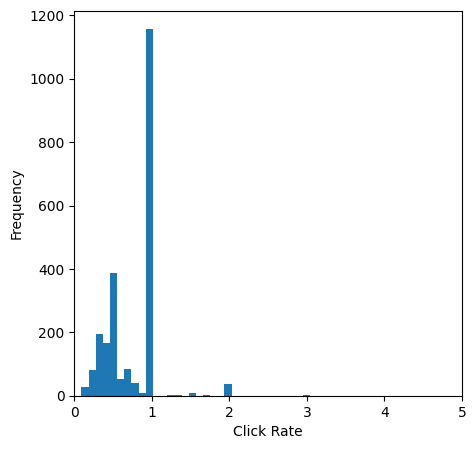

In [137]:
df_histo = df_clkpv["click rate"].plot(kind="hist", bins = 1000, figsize=(5,5))
df_histo.set_xlim(0,5)
_ = df_histo.set_xlabel("Click Rate")

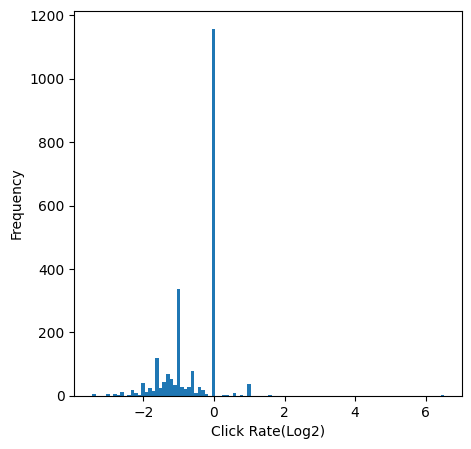

In [138]:
import numpy as np

df_clkpv["click_rate_log2"] = np.log2(df_clkpv["click rate"])
df_log2_histo = df_clkpv["click_rate_log2"].plot(kind="hist", bins = 100, figsize=(5,5))
_ = df_log2_histo.set_xlabel("Click Rate(Log2)")


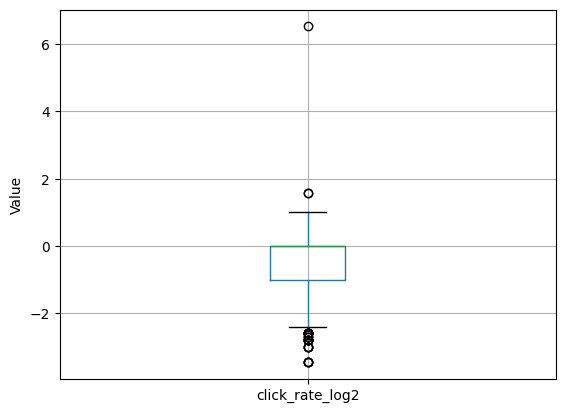

In [139]:
df_box = df_clkpv.boxplot(column = "click_rate_log2")
_ = df_box.set_ylabel("Value")

### #6
[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

### Potential linear

In [142]:
df_6 = df[df["event"].isin(["click", "preview"])]

In [143]:
df6_clk = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
df6_clk = df6_clk.rename(columns={"event":"clicks"})
df6_prv = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
df6_prv = df6_prv.rename(columns={"event":"previews"})

df_6 = pd.merge(left=df_6, right=df6_clk, how="left", on="linkid")
df_6 = pd.merge(left=df_6, right=df6_prv, how="left", on="linkid")
df_6.dropna(subset=["clicks", "previews"], inplace=True)
df_6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


In [148]:
df_6.corr(numeric_only=True)


,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


### Categorical

In [149]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]

In [152]:
factorized_df = df_6[categorical_columns] \
    .apply(lambda x: pd.factorize(x)[0]) \
    .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


So by looking at the correlation above,

Artist, Album, and Track are dependent to each other.(high positive correlation)